In [1]:
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import librosa as lib
from librosa import display
import seaborn as sns
from scipy.signal import hilbert, chirp
from scipy.fftpack import fft, dct, idct
from scipy.fft import fftfreq
sns.set_theme(style="whitegrid")

#Funciones
def media_movil(t,y,HW):
    import numpy as np
    """
    Calculo de la media movil
    """
    N = np.size(y)
    W = np.round(2*HW).astype(int)
   
    ymm = np.zeros(N-2*HW)
    tmm = np.zeros(N-2*HW)
   
    for i in np.arange(HW,N-HW):
        ymm[i-HW] = np.mean( y[i-HW:i+HW] )
        tmm[i-HW] = t[i]
       
    return tmm, ymm

def hallar_picos(to,yo,HW,Npasadas=1):
    import numpy as np
   
    tS = to
    yS = yo
   
    for i in range(Npasadas):
        tS, yS = media_movil(tS,yS,HW)
   
    tp = np.empty((0, 1))
    yp = np.empty((0, 1))
   
    for i in range(1,len(yS)-1):
        if (yS[i-1] < yS[i] ) & (yS[i] > yS[i+1]):
            idx = np.where(to==tS[i])
            tp = np.append(tp, [to[idx]])
            yp = np.append(yp, [yo[idx]])
   
    return tp, yp

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

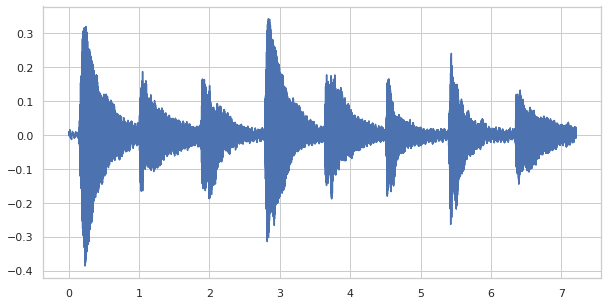

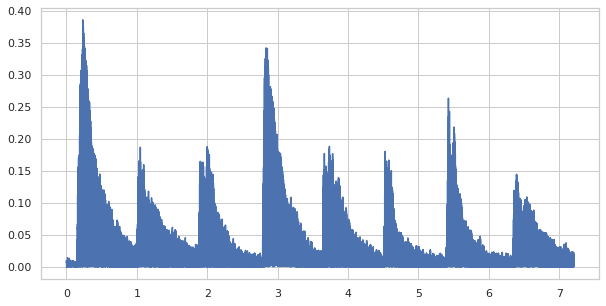

In [2]:
#Carga de datos
nombre = '/home/felipe/Documentos/tesis/datos_entrenamiento/do_mayor_piano'
sufijo = '.wav'
file_path = nombre + sufijo         
samples, sampling_rate = lib.load(file_path)    
duration_of_sound = len(samples)/sampling_rate
sr=sampling_rate
time= np.linspace(0,duration_of_sound,len(samples))
plt.figure(figsize=(10,5))
plt.plot(time,samples)

plt.figure(figsize=(10,5))
plt.plot(time,np.abs(samples))

In [3]:
#Envolvente y suavidad
signal = samples
analytic_signal= hilbert(signal) #envolvente entera
#signal *= (1.0 + 0.5='rt(signal,N=None))
amplitude_envelope = np.abs(analytic_signal) #en modulo
amplitude_envelope=moving_average(amplitude_envelope,1000) #suavizo
time_envelope= np.linspace(0,duration_of_sound,len(amplitude_envelope))
#graficos
#plt.figure(figsize=(10,5))
#plt.plot(amplitude_envelope,'-', label='envolvente')
#plt.legend()
#plt.show()

#plt.figure(figsize=(10,5))
#plt.plot(np.abs(samples),'.', label='señal')
#plt.legend()
#plt.show()

oenv = lib.onset.onset_strength(y=samples, sr=sampling_rate)
times = lib.times_like(oenv)
# Detect events without backtracking
onset_raw = lib.onset.onset_detect(onset_envelope=oenv,
                                       backtrack=False)
onset_bt = lib.onset.onset_backtrack(onset_raw, oenv)

#plt.figure(figsize=(10,5))
#plt.vlines(onset_bt,ymin=0, ymax=max_env)
#plt.legend()
#plt.show()

#plt.figure(figsize=(10,5))
#plt.plot(times, oenv, label='Onset strength')
#plt.vlines(lib.frames_to_time(onset_raw), 0, oenv.max(), label='Raw onsets', color='k')
#plt.vlines(lib.frames_to_time(onset_bt), 0, oenv.max(), label='Backtracked', color='r')
#plt.legend()
#plt.label_outer()

#plt.figure(figsize=(10,5))
#plt.plot(time_envelope,amplitude_envelope,'-', label='envolvente')
#plt.legend()
#plt.show()

#plt.figure(figsize=(10,5))
#plt.plot(np.abs(samples),'.', label='señal')
#plt.legend()
#plt.show()


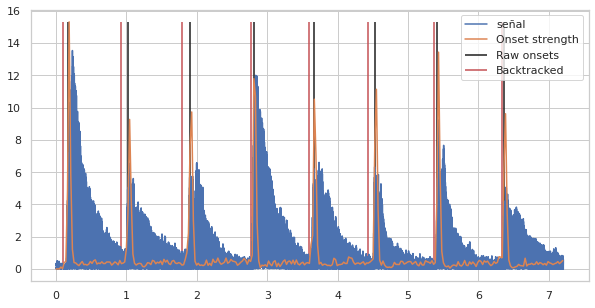

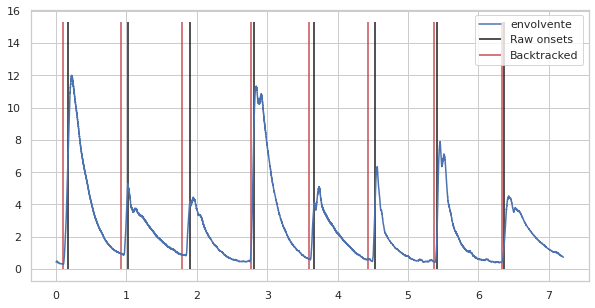

In [4]:
#Figuritas

plt.figure(figsize=(10,5))
plt.plot(time,12*np.abs(samples)/np.max(samples), label='señal')
plt.plot(times, oenv, label='Onset strength')
#plt.plot(time,samples, label='señal')
plt.vlines(lib.frames_to_time(onset_raw), 0, oenv.max(), label='Raw onsets', color='k')
plt.vlines(lib.frames_to_time(onset_bt), 0, oenv.max(), label='Backtracked', color='r')
plt.legend()
#plt.label_outer()
#plt.xlim(0.6,1)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(time_envelope,12*amplitude_envelope/np.max(amplitude_envelope),'-', label='envolvente')
#plt.plot(times, oenv, label='Onset strength')
#plt.plot(time,samples, label='señal')
plt.vlines(lib.frames_to_time(onset_raw), 0, oenv.max(), label='Raw onsets', color='k')
plt.vlines(lib.frames_to_time(onset_bt), 0, oenv.max(), label='Backtracked', color='r')
plt.legend()
#plt.label_outer()
#plt.xlim(2.6,3)
plt.show()

In [6]:
tiempo_ataque= onset_raw-onset_bt
log_tiempos_ataque=np.log10(tiempo_ataque)
print(log_tiempos_ataque)
print(np.median(log_tiempos_ataque))

[0.47712125 0.60205999 0.69897    0.30103    0.47712125 0.60205999
 0.30103    0.        ]
0.47712125471966244


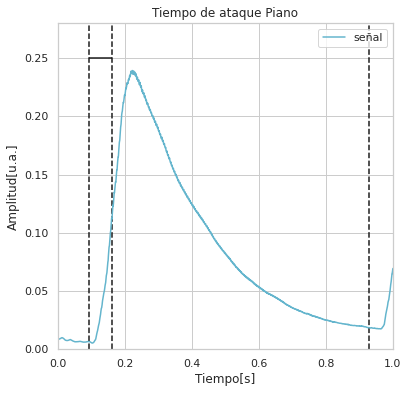

In [19]:
#figura linda 
tiempo_maximos=lib.frames_to_time(onset_raw)
tiempo_minimos=lib.frames_to_time(onset_bt)
plt.figure(figsize=(6,6))
plt.plot(time_envelope,amplitude_envelope, label='señal', color='c')
#plt.plot(tiempo_maximos, amplitude_envelope[peaks], "x")
#plt.plot(tiempo_minimos, amplitude_envelope[mins], "x")
#linestyles{'solid', 'dashed', 'dashdot', 'dotted'
plt.vlines(tiempo_maximos, 0, 0.28, colors='k', linestyles='dashed')
plt.vlines(tiempo_minimos, 0, 0.28, colors='k', linestyles='dashed')
plt.xlim(0,1)
plt.ylim(0,.28)
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud[u.a.]')
plt.hlines(0.25,tiempo_minimos[0], tiempo_maximos[0],colors='k' )
#plt.annotate('Tiempo de Ataque', (1.12,0.025),(1.09,0.028), arrowprops=dict() )
plt.title('Tiempo de ataque Piano')
plt.legend()
plt.show()

### 